# UFCFVQ-15-M Programming for Data Science
# Week 8 Jupyter Notebook 
# Introduction to Matplotlib and Seaborn


## Goals
This notebook has been created to familiarise you with the Matplotlib and Seaborn package. Most of the code needed to progress through this Notebook has been provided for you. However, there are several coding tasks that you will need to complete yourself by entering code yourself.

The topics in this notebook include:
* General Tips for using Matplotlib
* Saving plots
* Matlab-style and OO-style interfaces
* Simple Line plots
* Scatterplots
* Errorbars
* Density and Contour Plots
* Histograms
* Subplots
* Annotations
* 3-D Plots
* Intro to Seaborn

# Visualization with Matplotlib

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib. It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often in this Notebook.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures. Throughout this section, we will adjust this style as needed. Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [2]:
plt.style.use('classic')

### Plotting from an Jupyter Notebook
Plotting interactively within an Jupyter Notebook can be done with the ``%matplotlib`` command. In the Jupyter Notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

For the remainder of this Notebook session we will use the ``inline`` option:

In [3]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

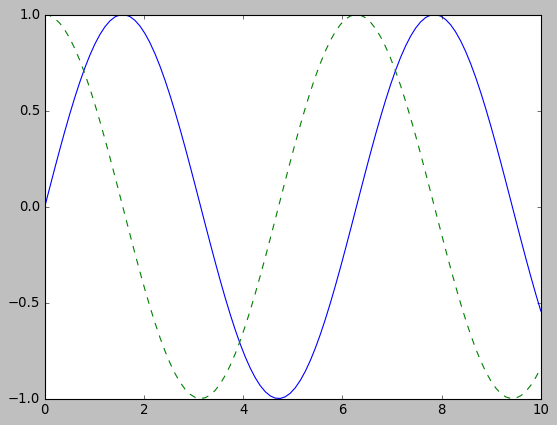

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [5]:
fig.savefig('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [6]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

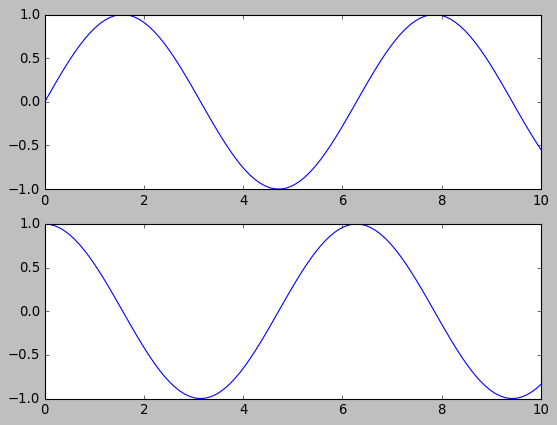

In [7]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied. You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines. While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

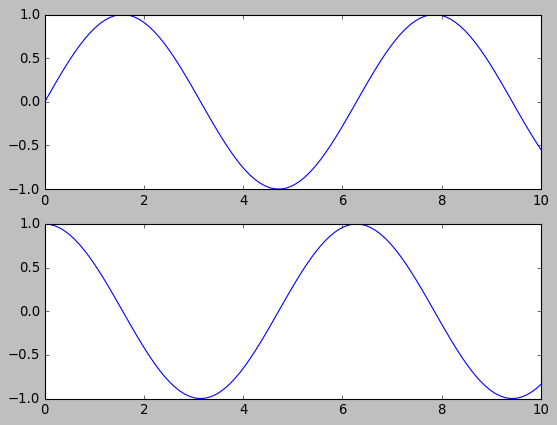

In [8]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.
As with all the following sections, we'll start by setting up the notebook for plotting and  importing the packages we will use:

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

For all Matplotlib plots, we start by creating a figure and an axes.
In their simplest form, a figure and axes can be created as follows:

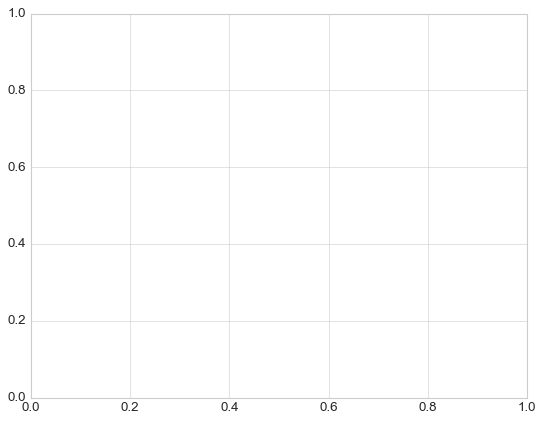

In [10]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. Throughout this Notebook, we'll commonly use the variable name ``fig`` to refer to a figure instance, and ``ax`` to refer to an axes instance or group of axes instances. Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

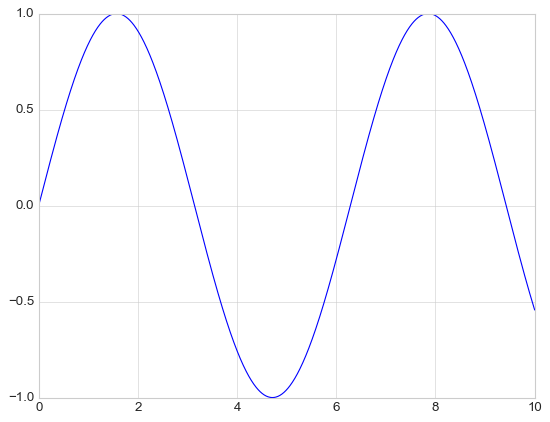

In [11]:
# MATLAB-style interface
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

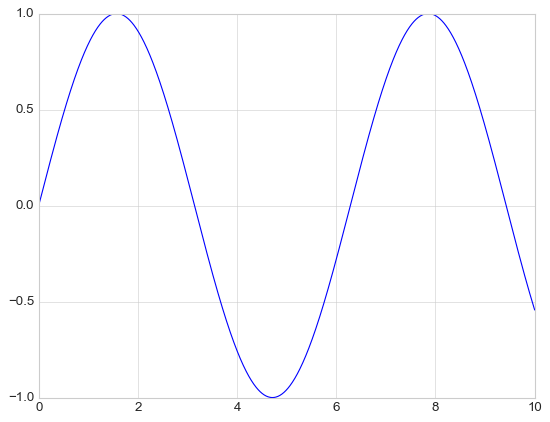

In [12]:
# Object-oriented interface
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

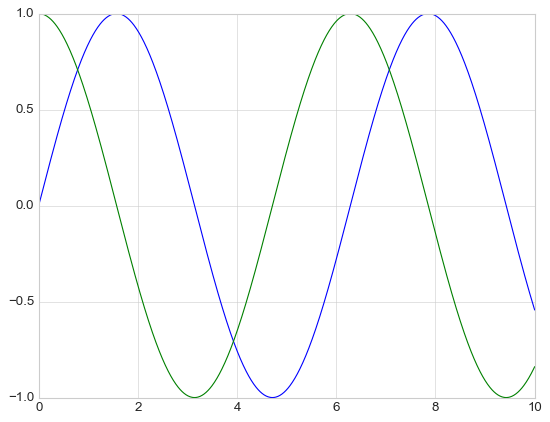

In [13]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles. The ``plt.plot()`` function takes additional arguments that can be used to specify these. To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color. If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines. The color can be specified in a variety of ways:

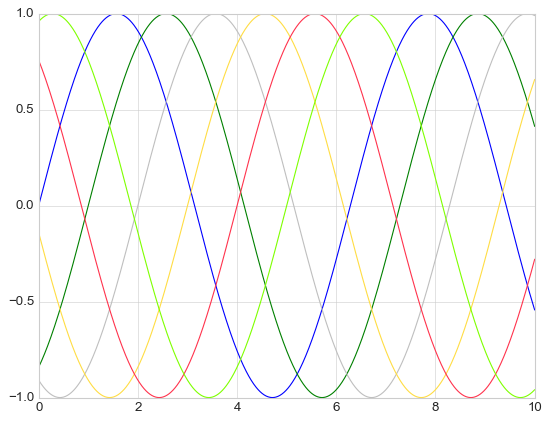

In [14]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

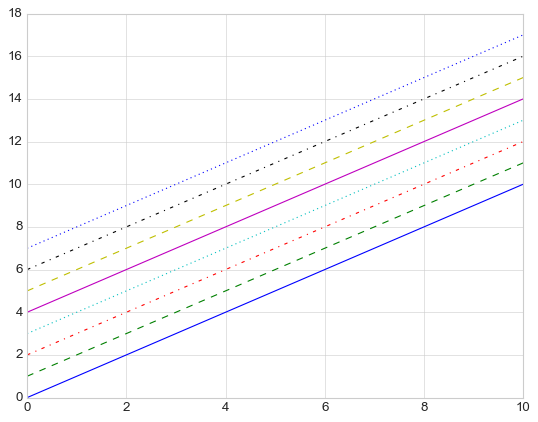

In [15]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

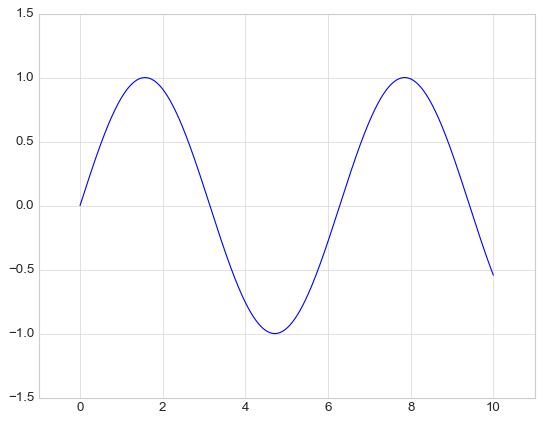

In [16]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

A useful related method is ``plt.axis()`` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*).
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

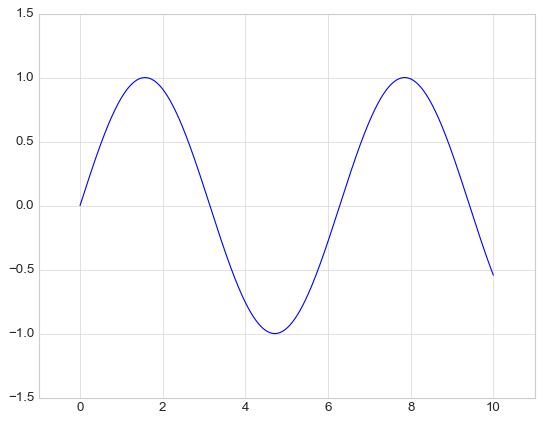

In [17]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

## Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends. The position, size, and style of these labels can be adjusted using optional arguments to the function. Titles and axis labels are the simplest such labels — there are methods that can be used to quickly set them:

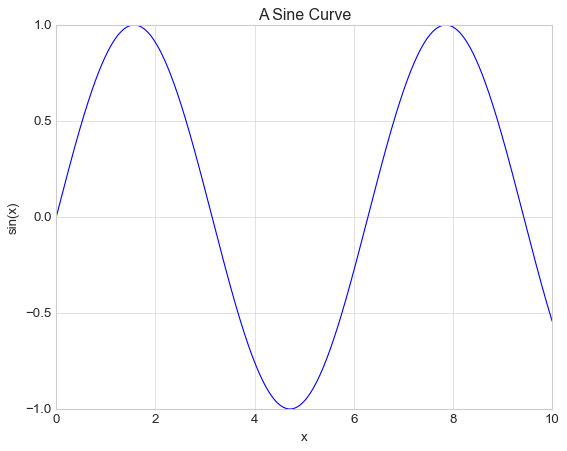

In [18]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend. It is done via the ``plt.legend()`` method. The ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label. Though there are several valid ways of using this, the easiest is to specify the label of each line using the ``label`` keyword of the plot function:

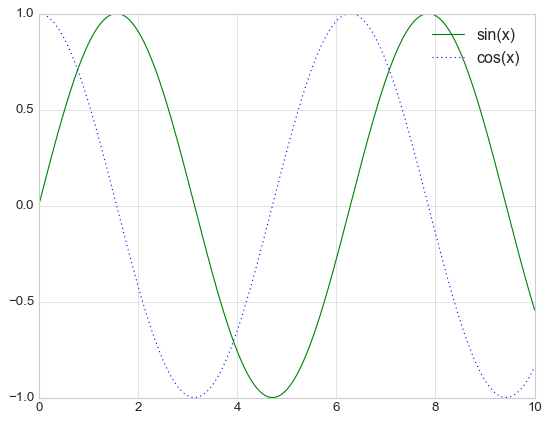

In [19]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')

plt.legend();

### <font color='red'><u>Worksheet Exercises</u></font>
1. Plot the following function: $y = 5x^{2} - 2x + 2$, where x ranges between -1 and 1. Use a red dashed line.
2. Now, add axis labels `x` and `y` respectively.
3. Now, set the y axis limits between 0 to 10
4. Finally, add a title to the plot showing the mathematical function used to generate it.

Text(0.5, 1.0, '$y = 5x^{2} - 2x + 2$')

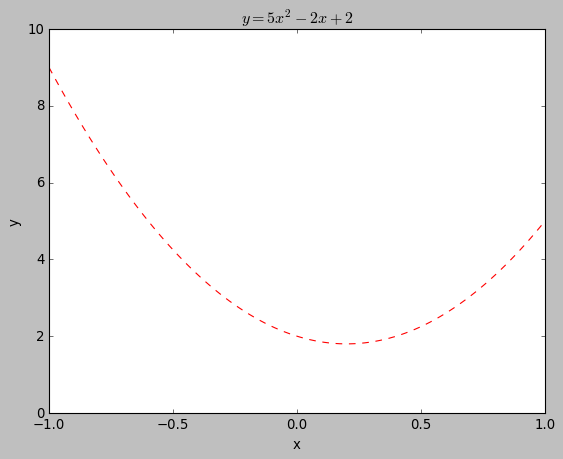

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

# 1.
x = np.linspace(-1, 1, 100)
plt.plot(x,5*x*x-2*x+2,color='red', linestyle='dashed')

# 2.
plt.xlabel("x")
plt.ylabel("y")

# 3.
plt.ylim(0,10)

# 4.
plt.title(r'$y = 5x^{2} - 2x + 2$')

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

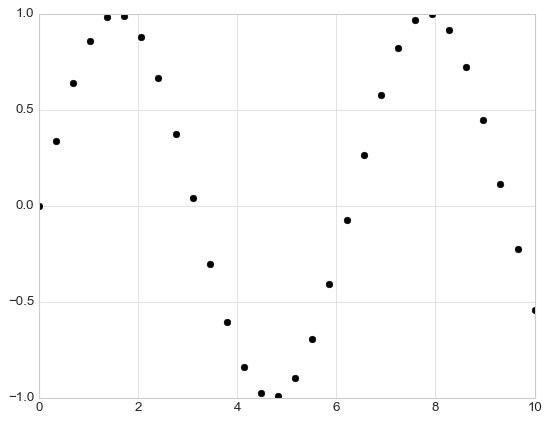

In [22]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. Most of the possibilities are fairly intuitive. Here are a number of the more common ones:

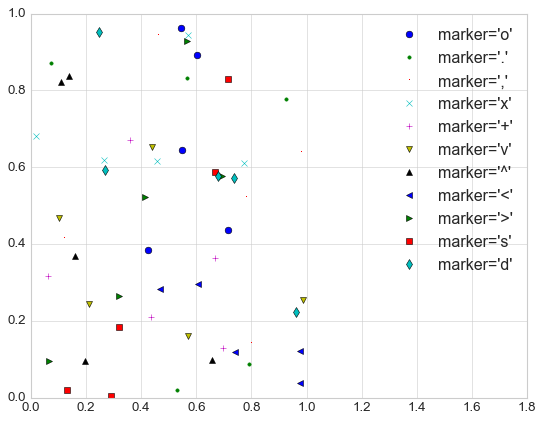

In [23]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

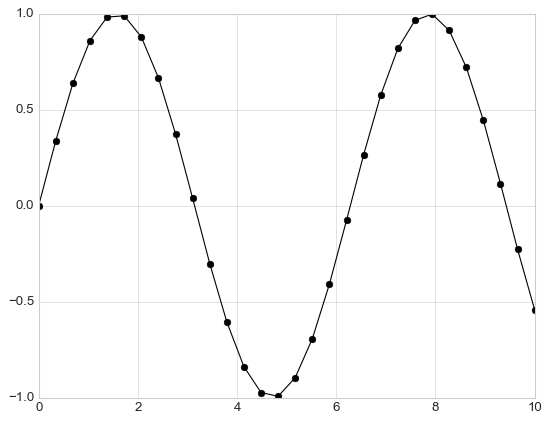

In [24]:
plt.plot(x, y, '-ok');

## Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

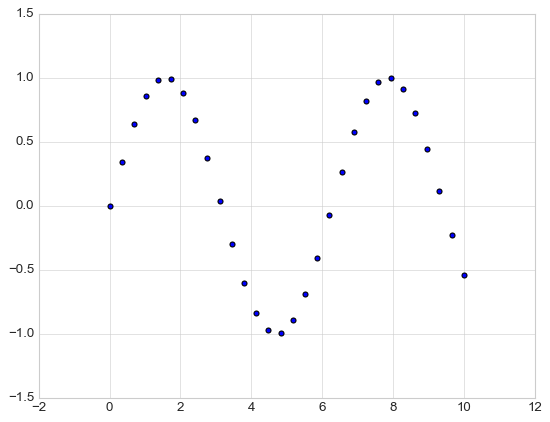

In [25]:
plt.scatter(x, y, marker='o');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data. Let's show this by creating a random scatter plot with points of many colors and sizes. In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

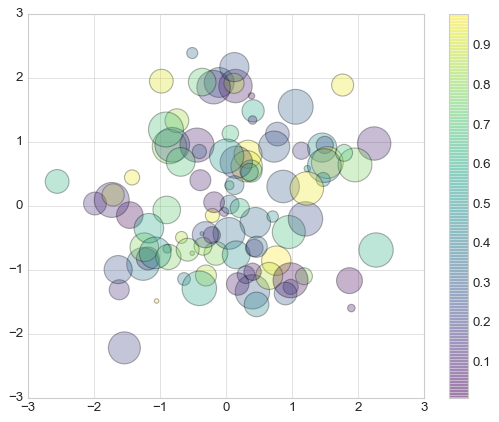

In [26]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels. In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

## ``plot`` Versus ``scatter``: A Note on Efficiency

Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

### <font color='red'><u>Worksheet Exercises</u></font>
1. Plot the following function using ``scatter()``: $y = 2 \pm \sqrt{(25-(x-4)^{2})}$, where x ranges between -1 and 9 with a step size of 25. Use a green square marker. Use the function `plt.axis('equal')` to ensure the aspect ratio is correct.
2. Using the file `data\insurance.csv`, produce a scatterplot of `bmi` vs `charges`. You should load this file into memory using the NumPy function `genfromtxt()`. Add relevant axis labels and a title.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# 1.
x = np.linspace(-1,9,25)
y = 2 + (25-(x-4)**2)**0.5
y2 = 2 - (25-(x-4)**2)**0.5
plt.scatter(x,y,marker='s',color='green')
plt.scatter(x,y2,marker='s',color='green')
plt.axis('equal')

# 2.
plt.clf() # this function clears the previous plot
data = np.genfromtxt('data\insurance_edited.csv',delimiter=',',skip_header=True)
plt.scatter(data[:,0],data[:,1],marker='o',color='red')
plt.xlabel("BMI")
plt.ylabel("Insurance Charge")
plt.title('BMI vs Insurance Charge')

OSError: data\insurance_edited.csv not found.

<Figure size 640x480 with 0 Axes>

# Visualizing Errors

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself. In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Basic Errorbars

A basic errorbar can be created with a single Matplotlib function call:

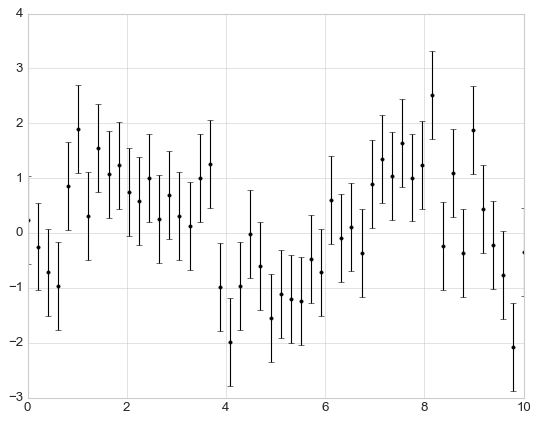

In [29]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the ``fmt`` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in ``plt.plot``, outlined above.

# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images. This section looks at several examples of using these.

## Visualizing a Three-Dimensional Function

We'll start by demonstrating a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$:

In [30]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

In [31]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

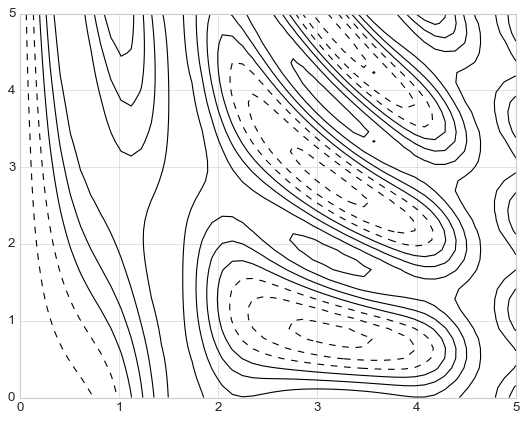

In [32]:
plt.contour(X, Y, Z, colors='black');

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.
Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

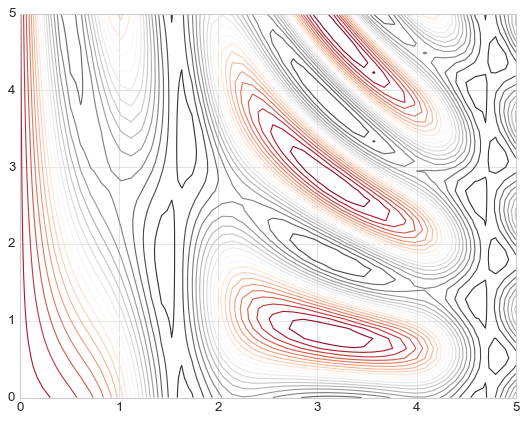

In [33]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose the ``RdGy`` (short for *Red-Gray*) colormap, which is a good choice for centered data. Matplotlib has a wide range of colormaps available. The plot is looking nicer, but the spaces between the lines may be a bit distracting. We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``. Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot:

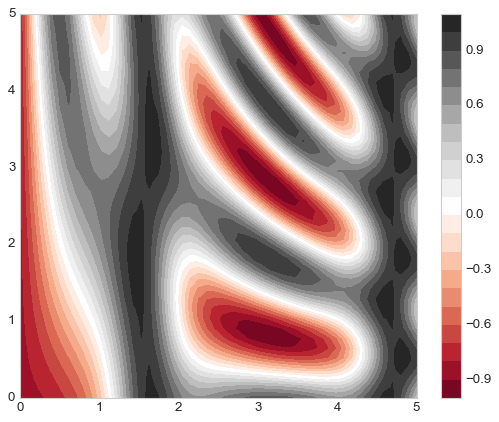

In [34]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

### <font color='red'><u>Worksheet Exercises</u></font>
1. Plot the following three-dimensional function using the ``contour()`` function: $f(x,y) = x^2+3y^2 * e^{-x^2-y^2}$, where x and y range between -2 and 2. Use the colormap `Oranges`.
2. Plot the same function as used in 1. using the ``contourf()`` function.
3. Experiment with other colomap options (see https://matplotlib.org/stable/tutorials/colors/colormaps.html for more information).

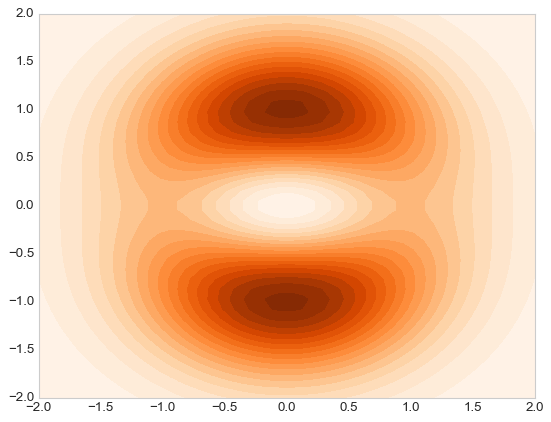

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# 1.
def f(x, y):
    return (x**2+3*y**2)*np.exp(-(x*x)-(y*y))
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, 20, cmap='Oranges');

# 2.
plt.clf() # this function clears the previous plot
def f(x, y):
    return (x**2+3*y**2)*np.exp(-(x*x)-(y*y))
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contourf(X, Y, Z, 20, cmap='Oranges');


# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.

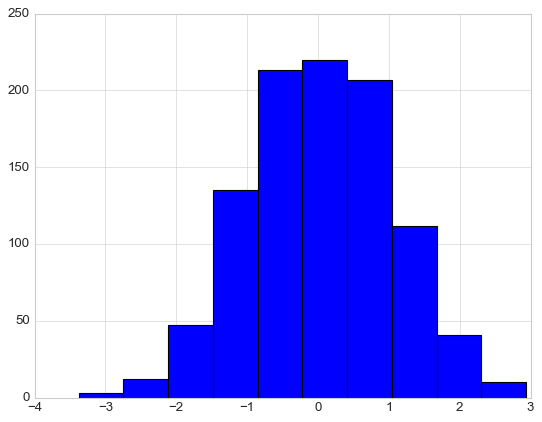

In [36]:
data = np.random.randn(1000)

plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; here's an example of a more customized histogram (which has 30 bins):

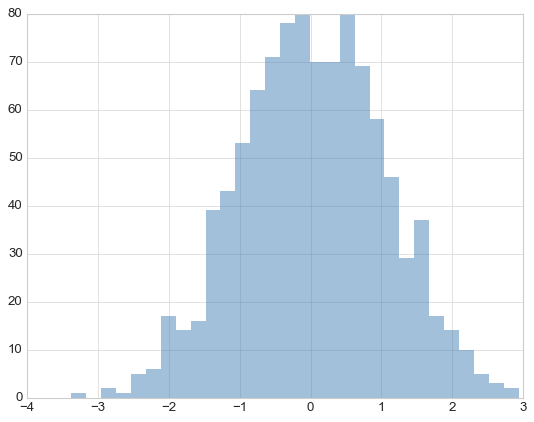

In [37]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

In [38]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

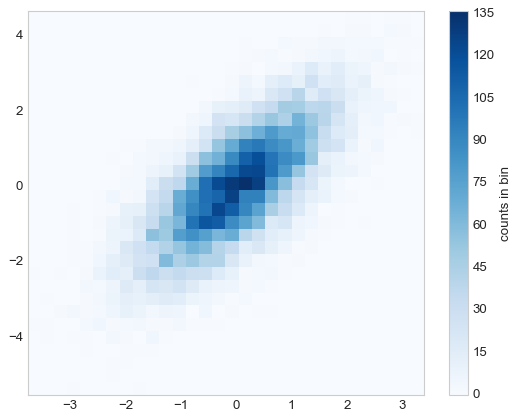

In [39]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

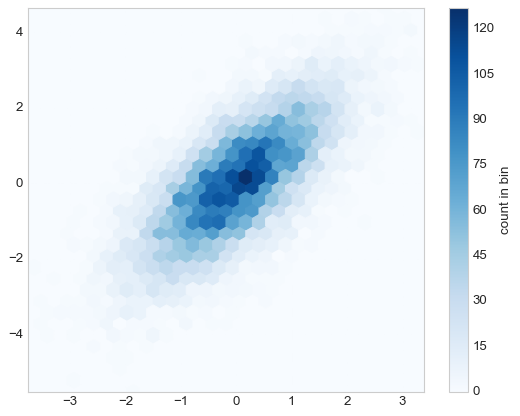

In [40]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

``plt.hexbin`` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

### <font color='red'><u>Worksheet Exercises</u></font>
1. Using the file `data\president_heights.csv`, produce a histogram with 10 bins. Use an appropriate colourmap, axis labels and title.
2. Using the file `data\insurance.csv`, produce a 2 dimensional histogram with 12 bins. Use an appropriate colourmap, axis labels and title. Also add a colorbar to indicate bin counts.
3. Repeat 2. above using the ``hexbin()`` function. Set the ``gridsize`` parameter to 12.

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# 1.
data = np.genfromtxt('data\president_heights.csv',delimiter=',',skip_header=True)
plt.hist(data[:,2],bins=10)

# 2.
plt.clf() # this function clears the previous plot
data = np.genfromtxt('data\insurance.csv',delimiter=',',skip_header=True)
plt.hist2d(data[:,0],data[:,1],bins=12, cmap='Blues')
plt.title("2D Histogram of BMI vs Insurance Charge")
plt.xlabel("BMI")
plt.ylabel("Insurance Charge");
cb = plt.colorbar(label='count in bin')

# 3.
plt.clf() # this function clears the previous plot
data = np.genfromtxt('data\insurance.csv',delimiter=',',skip_header=True)
plt.hexbin(data[:,0],data[:,1],gridsize=12, cmap='Blues')
plt.title("2D Histogram (Hex) of BMI vs Insurance Charge")
plt.xlabel("BMI")
plt.ylabel("Insurance Charge");
cb = plt.colorbar(label='count in bin')

OSError: data\president_heights.csv not found.

# Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements:

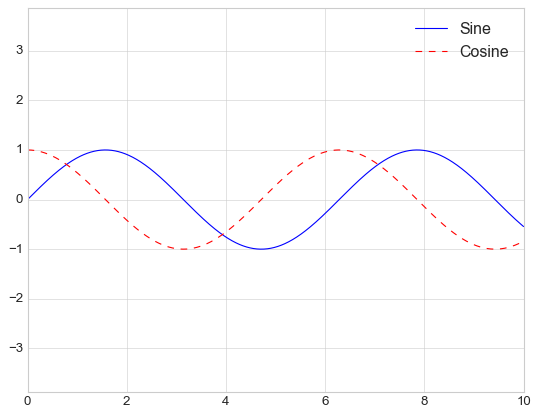

In [42]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

But there are many ways we might want to customize such a legend. For example, we can specify the location and turn on/off the frame:

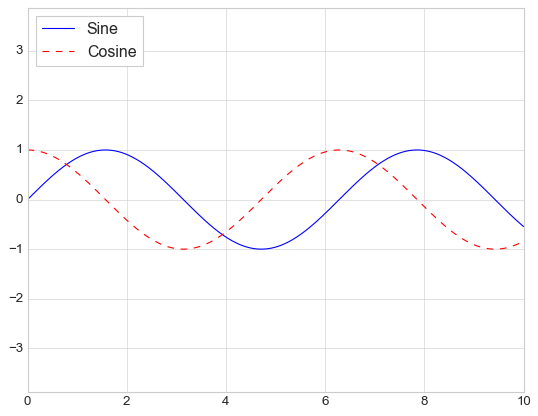

In [43]:
ax.legend(loc='upper left', frameon=True)
fig

Or change the legend frame into a fancybox allowing you to further customise the legend.

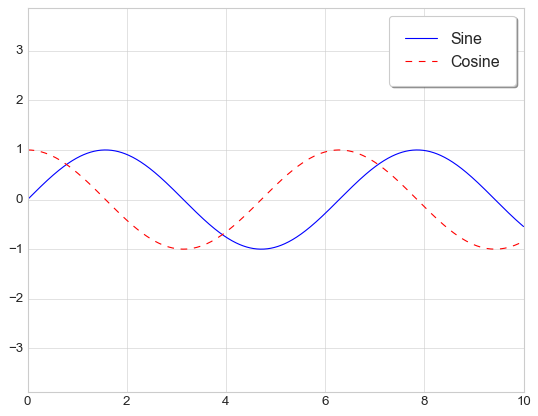

In [44]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
fig

# Multiple Subplots

Sometimes it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts. In this section we'll explore four routines for creating subplots in Matplotlib.

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## ``plt.axes``: Subplots by Hand

The most basic method of creating an axes is to use the ``plt.axes`` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system.
These numbers represent ``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

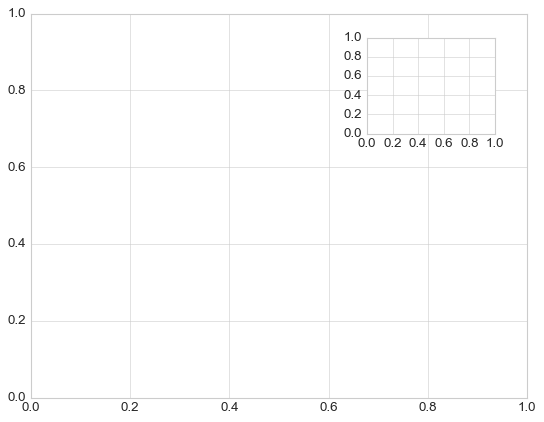

In [46]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

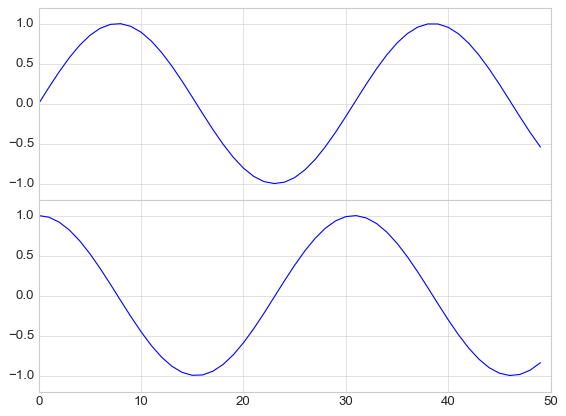

In [47]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

## ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

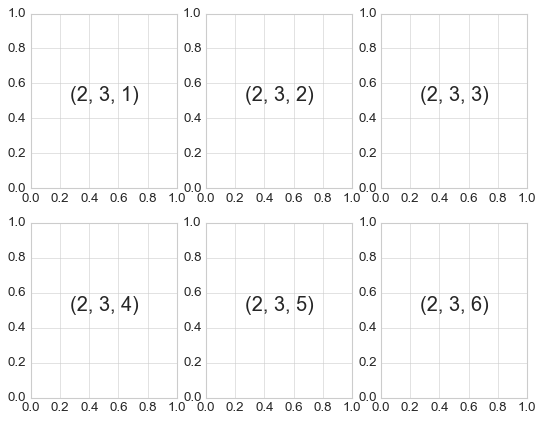

In [48]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command ``plt.subplots_adjust`` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, ``fig.add_subplot()``:

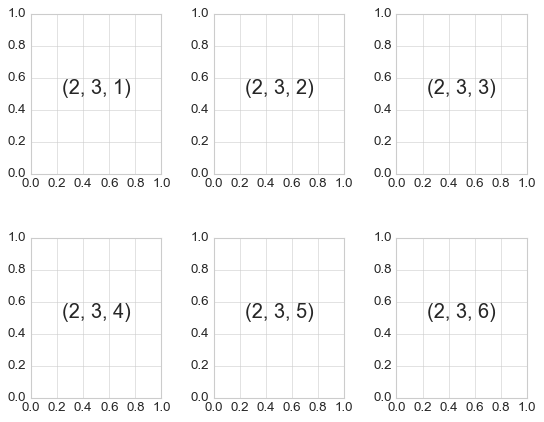

In [49]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

We've used the ``hspace`` and ``wspace`` arguments of ``plt.subplots_adjust``, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

## ``plt.subplots``: The Whole Grid in One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

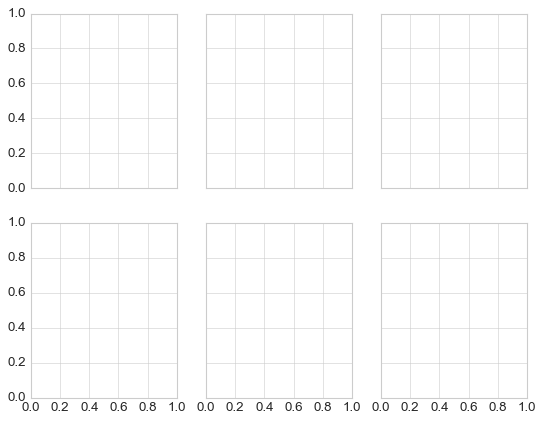

In [50]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

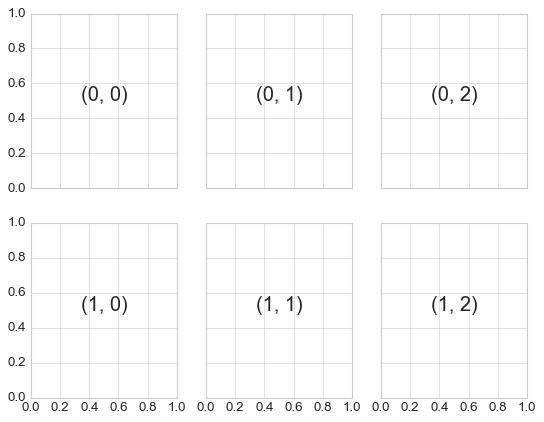

In [51]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to ``plt.subplot()``, ``plt.subplots()`` is more consistent with Python's conventional 0-based indexing.

## ``plt.GridSpec``: More Complicated Arrangements

To go beyond a regular grid to subplots that span multiple rows and columns, ``plt.GridSpec()`` is the best tool.
The ``plt.GridSpec()`` object does not create a plot by itself; it is simply a convenient interface that is recognized by the ``plt.subplot()`` command.
For example, a gridspec for a grid of two rows and three columns with some specified width and height space looks like this:

In [52]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

From this we can specify subplot locations and extents using the familiary Python slicing syntax:

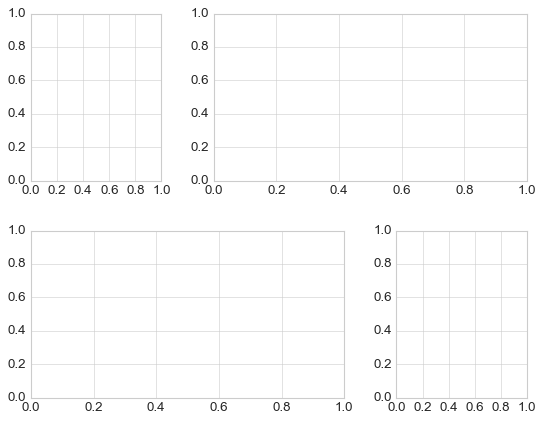

In [53]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

# Text and Annotation

Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary. Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this.

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Transforms and Text Position

In Matplotlib, anchoring text to a position on the axis or figure can be done by modifying the *transform*. Any graphics display framework needs some scheme for translating between coordinate systems. For example, a data point at $(x, y) = (1, 1)$ needs to somehow be represented at a certain location on the figure, which in turn needs to be represented in pixels on the screen. Mathematically, such coordinate transformations are relatively straightforward, and Matplotlib has a well-developed set of tools that it uses internally to perform them.

The average user rarely needs to worry about the details of these transforms, but it is helpful knowledge to have when considering the placement of text on a figure. There are three pre-defined transforms that can be useful in this situation:

- ``ax.transData``: Transform associated with data coordinates
- ``ax.transAxes``: Transform associated with the axes (in units of axes dimensions)
- ``fig.transFigure``: Transform associated with the figure (in units of figure dimensions)

Here let's look at an example of drawing text at various locations using these transforms:

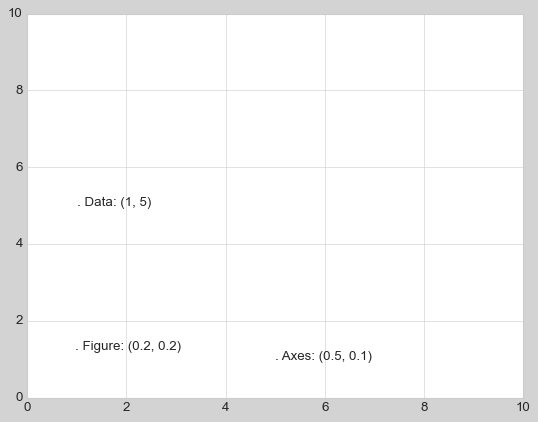

In [55]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

Note that by default, the text is aligned above and to the left of the specified coordinates: here the "." at the beginning of each string will approximately mark the given coordinate location. The ``transData`` coordinates give the usual data coordinates associated with the x- and y-axis labels. The ``transAxes`` coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the axes size. The ``transFigure`` coordinates are similar, but specify the position from the bottom-left of the figure (here the gray box), as a fraction of the figure size. Notice now that if we change the axes limits, it is only the ``transData`` coordinates that will be affected, while the others remain stationary:

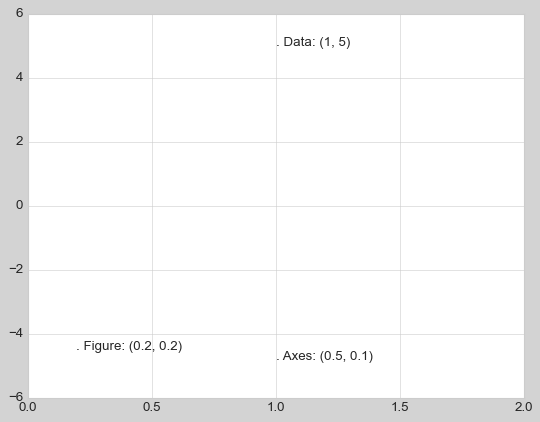

In [56]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Arrows and Annotation

Along with tick marks and text, another useful annotation mark is the simple arrow. Using the ``plt.annotate()`` function to create some text and an arrow, and the arrows can be very flexibly specified. Here we'll use ``annotate`` with several of its options:

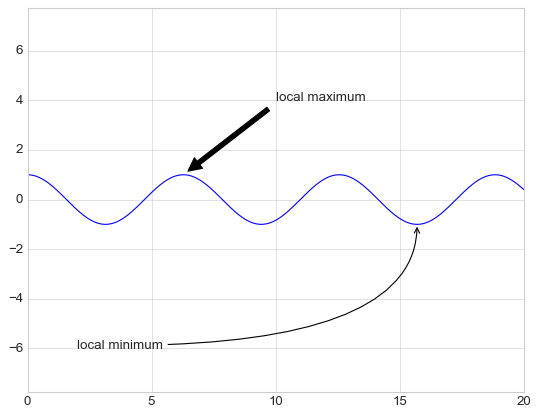

In [57]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

The arrow style is controlled through the ``arrowprops`` dictionary, which has numerous options available. These options are fairly well-documented in Matplotlib's online documentation.

# Three-Dimensional Plotting in Matplotlib

Matplotlib was initially designed with only two-dimensional plotting in mind.
Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.
three-dimensional plots are enabled by importing the ``mplot3d`` toolkit, included with the main Matplotlib installation:

In [58]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword ``projection='3d'`` to any of the normal axes creation routines:

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

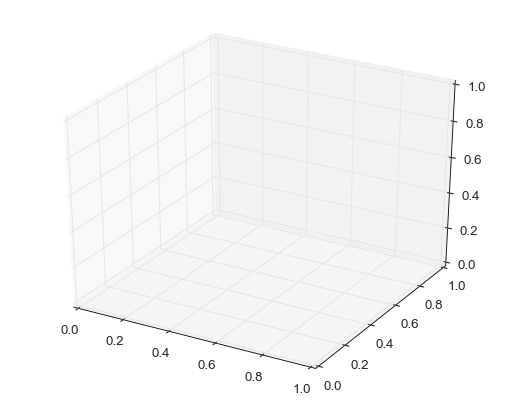

In [60]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types.

## Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions. The call signature for these is nearly identical to that of their two-dimensional counterparts. Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

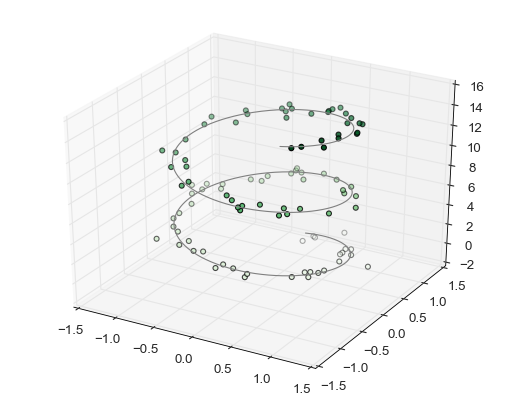

In [61]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page.

## Three-dimensional Contour Plots

Analogous to the contour plots we explored in Density and Contour Plots above, ``mplot3d`` contains tools to create three-dimensional relief plots using the same inputs. Like two-dimensional ``ax.contour`` plots, ``ax.contour3D`` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point. Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [62]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

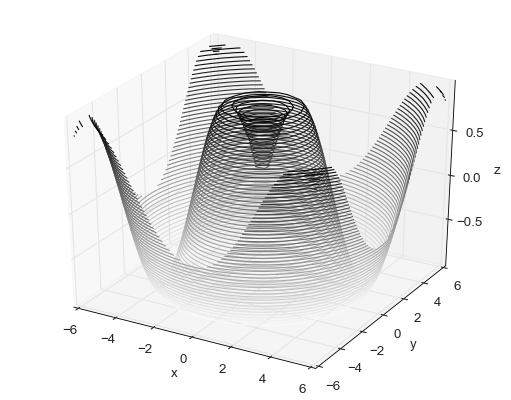

In [63]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not optimal, in which case we can use the ``view_init`` method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

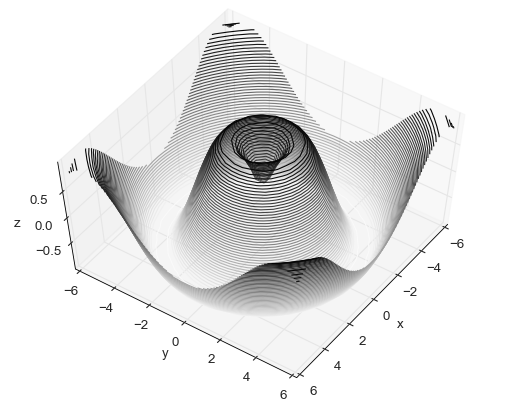

In [64]:
ax.view_init(60, 35)
fig

## Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots.
These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize.
Here's an example of using a wireframe:

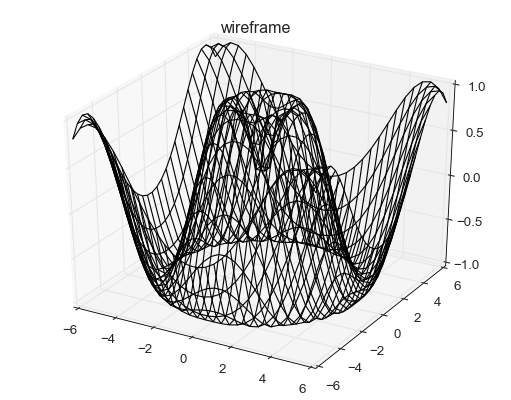

In [65]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

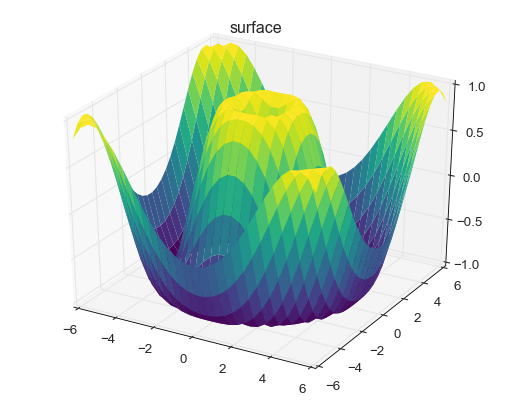

In [66]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

# Visualization with Seaborn

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

## Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

In [67]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Now we create some random walk data:

In [68]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

And do a simple plot:

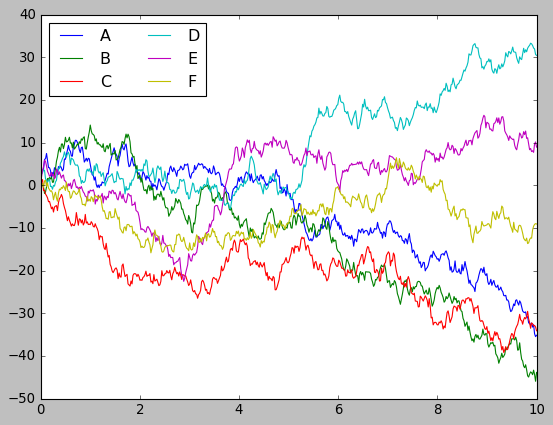

In [69]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [70]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

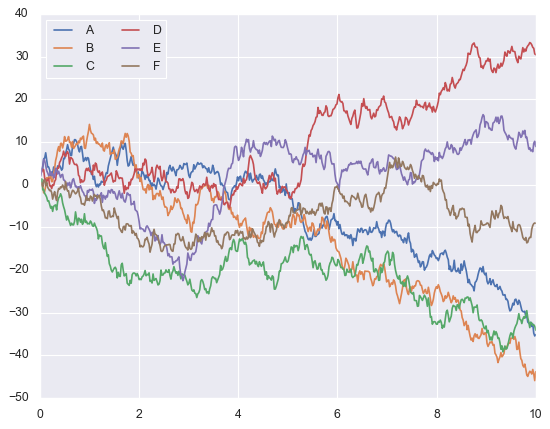

In [71]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting. Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

In [72]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [73]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

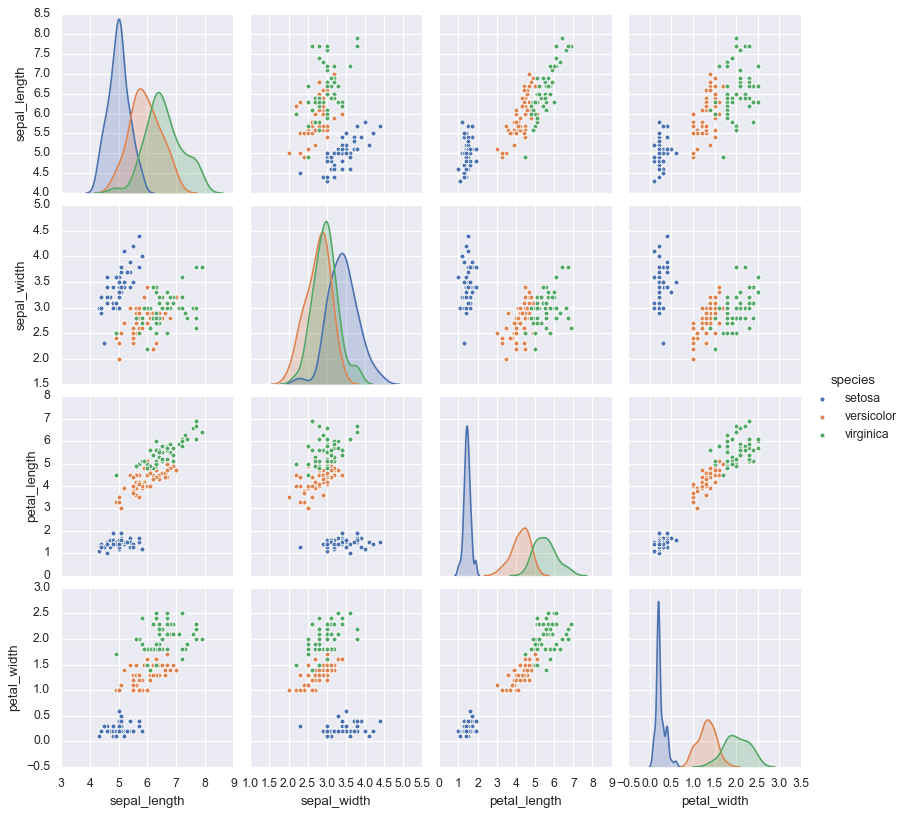

In [74]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [75]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


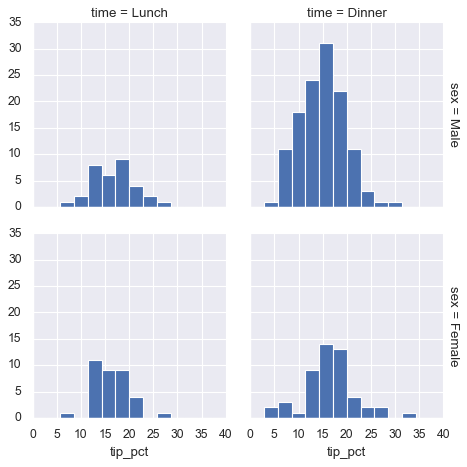

In [76]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

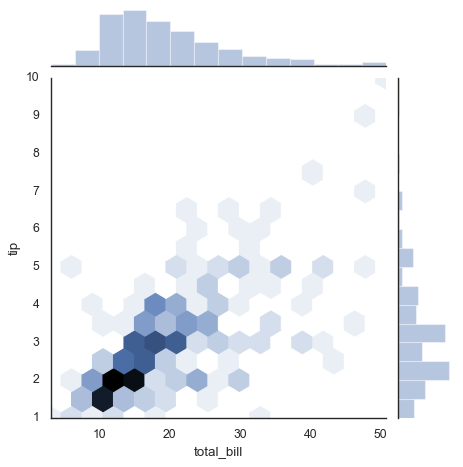

In [77]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

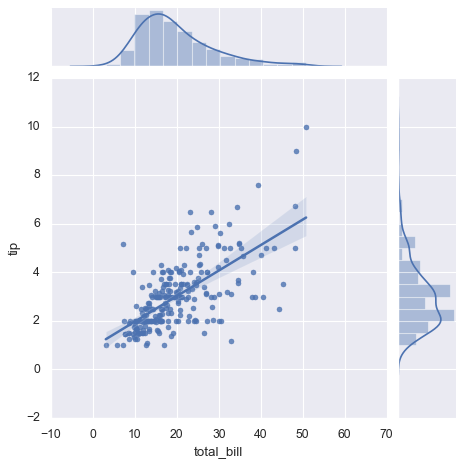

In [78]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### Bar plots

Time series can be plotted using ``sns.catplot``. In the following example, we'll use the Planets data:

In [79]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


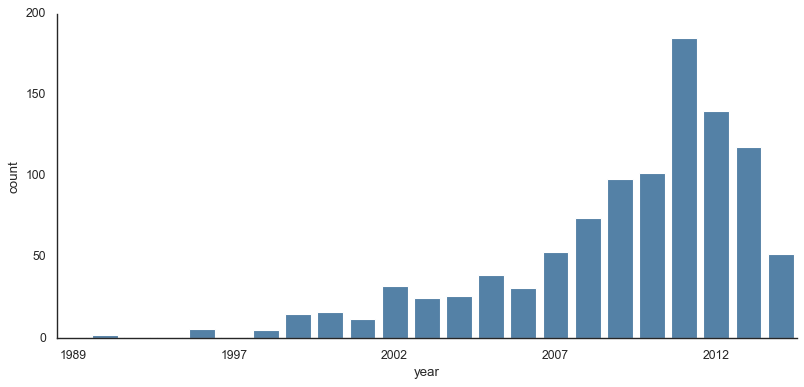

In [80]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets:

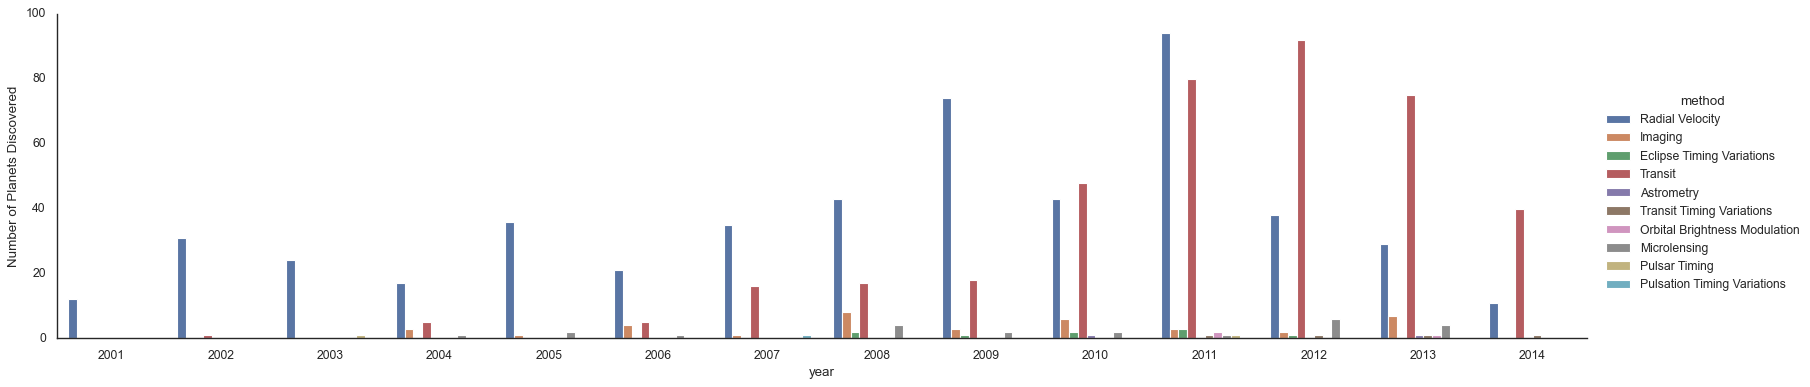

In [81]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

### <font color='red'><u>Worksheet Exercises</u></font>
1. Draw a Seaborn scatter plot which shows two sets of marks for Mathematics and Science. Use the following data for this question: 
    * `Math Marks` = 88, 92, 80, 89, 100, 80, 60, 100, 80, 34
    * `Science Marks` = 35, 79, 79, 48, 100, 88, 32, 45, 20, 30
    * `Range of Marks` = 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
2. Using the Seaborn dataset `flights.csv`, draw a Seaborn histogram showing passengers numbers using the default bin width.
3. Adjust the histogram in 2. to use 20 bins.

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 1.
sns.set()
math_marks = [88, 92, 80, 89, 100, 80, 60, 100, 80, 34]
science_marks = [35, 79, 79, 48, 100, 88, 32, 45, 20, 30]
marks_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.scatterplot(x=marks_range, y=math_marks, label='Maths marks', color='red')
sns.scatterplot(x=marks_range, y=science_marks, label='Science marks', color='blue')

# 2.
plt.clf() # this function clears the previous plot
flights = sns.load_dataset("flights")
sns.histplot(data=flights, x='passengers')

# 3.
plt.clf() # this function clears the previous plot
flights = sns.load_dataset("flights")
sns.histplot(data=flights, x='passengers', bins=20)

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 640x480 with 0 Axes>